# Predicting Movie Ratings - Linear SVC

## Features: genre, corpus length, plot

#### In this notebook we will be building a Linear SVC to predict movies' Motion Picture Association rating.

In [1]:
# Dependencies
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/ZTC/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ZTC/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ZTC/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Visualize more columns
pd.options.display.max_columns = None

# Load data

In [3]:
path = os.path.join('..', 'resources','cleaned_data', 'movies_complete_cleaned.csv')
# path = "https://data-bootcamp-ztc.s3.amazonaws.com/movies_complete_cleaned.csv"
df = pd.read_csv(path)
# Drop Null values in `plot` column
df = df.dropna(axis='index', subset=['plot'])

df.head(2)

,name,production,director,runtime,released,year,month,country_kaggle,country_omdb,star_kaggle,actors_omdb,writer_kaggle,writers_omdb,language_omdb,plot,awards,score_imdb,votes_imdb,score_metacritic,budget,genre_kaggle,gross,genres_omdb,rating
0,Doctor Strange,Marvel Studios,Scott Derrickson,115,2016-11-04,2016,11,USA,USA,Benedict Cumberbatch,"Benedict Cumberbatch, Chiwetel Ejiofor, Rachel...",Jon Spaihts,"Jon Spaihts, Scott Derrickson, C. Robert Cargi...",English,"Marvel's ""Doctor Strange"" follows the story of...",Nominated for 1 Oscar. Another 19 wins & 67 no...,7.5,348307,72.0,165000000,Action,232641920,"Action, Adventure, Fantasy, Sci-Fi",PG-13
1,Sleight,Diablo Entertainment (II),J.D. Dillard,89,2017-04-28,2016,4,USA,USA,Jacob Latimore,"Jacob Latimore, Seychelle Gabriel, Storm Reid,...",J.D. Dillard,"J.D. Dillard, Alex Theurer",English,A young street magician (Jacob Latimore) is le...,3 nominations.,5.9,4012,62.0,250000,Action,3986245,"Crime, Drama, Sci-Fi",R


**Add a feature that's the length of the raw text.**

In [4]:
df['length'] = [len(x) for x in df['plot']]

In [5]:
df.head(2)

,name,production,director,runtime,released,year,month,country_kaggle,country_omdb,star_kaggle,actors_omdb,writer_kaggle,writers_omdb,language_omdb,plot,awards,score_imdb,votes_imdb,score_metacritic,budget,genre_kaggle,gross,genres_omdb,rating,length
0,Doctor Strange,Marvel Studios,Scott Derrickson,115,2016-11-04,2016,11,USA,USA,Benedict Cumberbatch,"Benedict Cumberbatch, Chiwetel Ejiofor, Rachel...",Jon Spaihts,"Jon Spaihts, Scott Derrickson, C. Robert Cargi...",English,"Marvel's ""Doctor Strange"" follows the story of...",Nominated for 1 Oscar. Another 19 wins & 67 no...,7.5,348307,72.0,165000000,Action,232641920,"Action, Adventure, Fantasy, Sci-Fi",PG-13,464
1,Sleight,Diablo Entertainment (II),J.D. Dillard,89,2017-04-28,2016,4,USA,USA,Jacob Latimore,"Jacob Latimore, Seychelle Gabriel, Storm Reid,...",J.D. Dillard,"J.D. Dillard, Alex Theurer",English,A young street magician (Jacob Latimore) is le...,3 nominations.,5.9,4012,62.0,250000,Action,3986245,"Crime, Drama, Sci-Fi",R,289


In [6]:
genres_path = os.path.join('..', 'resources','cleaned_data', 'parsed_genres_table.csv')
df_genres = pd.read_csv(genres_path)

df_genres.head(2)

,name,genre_kaggle,genres_omdb,action,adventure,fantasy,sci-fi,crime,drama,history,comedy,biography,romance,horror,thriller,war,animation,family,sport,music,mystery,short,western,musical,documentary,film-noir,adult
0,Doctor Strange,Action,"Action, Adventure, Fantasy, Sci-Fi",1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Sleight,Action,"Crime, Drama, Sci-Fi",0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Select initial features to work with

In [7]:
# Select features
df_plot = df[['name', 'plot', 'rating', 'length']]
full_df = pd.merge(df_genres, df_plot, on='name', how='inner')
full_df.drop(columns=['genre_kaggle', 'genres_omdb'], inplace=True)
full_df.head(2)

,name,action,adventure,fantasy,sci-fi,crime,drama,history,comedy,biography,romance,horror,thriller,war,animation,family,sport,music,mystery,short,western,musical,documentary,film-noir,adult,plot,rating,length
0,Doctor Strange,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Marvel's ""Doctor Strange"" follows the story of...",PG-13,464
1,Sleight,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,A young street magician (Jacob Latimore) is le...,R,289


In [8]:
# Check if there's missing values
full_df.isna().any()

name           False
action         False
adventure      False
fantasy        False
sci-fi         False
crime          False
drama          False
history        False
comedy         False
biography      False
romance        False
horror         False
thriller       False
war            False
animation      False
family         False
sport          False
music          False
mystery        False
short          False
western        False
musical        False
documentary    False
film-noir      False
adult          False
plot           False
rating         False
length         False
dtype: bool

# Preprocessing - NLP - pt1

### Remove punctuations

In [9]:
import string

def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)


punc_removed = full_df.copy()
punc_removed["punc_removed"] = [remove_punct(x) for x in punc_removed['plot']]

In [10]:
punc_removed.head(2)

,name,action,adventure,fantasy,sci-fi,crime,drama,history,comedy,biography,romance,horror,thriller,war,animation,family,sport,music,mystery,short,western,musical,documentary,film-noir,adult,plot,rating,length,punc_removed
0,Doctor Strange,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Marvel's ""Doctor Strange"" follows the story of...",PG-13,464,Marvels Doctor Strange follows the story of th...
1,Sleight,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,A young street magician (Jacob Latimore) is le...,R,289,A young street magician Jacob Latimore is left...


### Tokenization

In [11]:
# Tokenization with `nltk.word_tokenize`
tokenized_df = punc_removed.copy()
tokenized_df['tokens'] = tokenized_df.\
    apply(lambda row: nltk.word_tokenize(row['punc_removed']), axis=1)

In [12]:
tokenized_df[['name', 'plot', 'punc_removed', 'tokens']].head(2)

,name,plot,punc_removed,tokens
0,Doctor Strange,"Marvel's ""Doctor Strange"" follows the story of...",Marvels Doctor Strange follows the story of th...,"[Marvels, Doctor, Strange, follows, the, story..."
1,Sleight,A young street magician (Jacob Latimore) is le...,A young street magician Jacob Latimore is left...,"[A, young, street, magician, Jacob, Latimore, ..."


### Stopwords removal

In [13]:
# Remove stopwords
from nltk.corpus import stopwords

stop = set(stopwords.words("english"))

def remove_stopwords(tokens):
    text = [word.lower() for word in tokens if word.lower() not in stop]
    return text

In [14]:
# Remove stopwords
filtered_df = tokenized_df.copy()

filtered_df["filtered"] = [remove_stopwords(x) for x in filtered_df["tokens"]]

In [15]:
filtered_df[['name', 'plot', 'punc_removed', 'tokens', 'filtered']].head(2)

,name,plot,punc_removed,tokens,filtered
0,Doctor Strange,"Marvel's ""Doctor Strange"" follows the story of...",Marvels Doctor Strange follows the story of th...,"[Marvels, Doctor, Strange, follows, the, story...","[marvels, doctor, strange, follows, story, tal..."
1,Sleight,A young street magician (Jacob Latimore) is le...,A young street magician Jacob Latimore is left...,"[A, young, street, magician, Jacob, Latimore, ...","[young, street, magician, jacob, latimore, lef..."


In [16]:
# Compare number of tokens pre- and post- stopwords removal
check_filter = filtered_df.copy()
check_filter['stopwords_filtered_out'] = ''

for index, row in check_filter.iterrows():
    token_count = len(check_filter.loc[index, 'tokens'])
    filtered_count = len(check_filter.loc[index, 'filtered'])
    check_filter.loc[index, 'stopwords_filtered_out'] = token_count - filtered_count

check_filter['stopwords_filtered_out'].value_counts()

27     133
24     132
32     129
31     128
22     128
      ... 
157      1
156      1
146      1
144      1
226      1
Name: stopwords_filtered_out, Length: 188, dtype: int64

In [17]:
check_filter[['name', 'tokens', 'filtered', 'stopwords_filtered_out']].head(3)

,name,tokens,filtered,stopwords_filtered_out
0,Doctor Strange,"[Marvels, Doctor, Strange, follows, the, story...","[marvels, doctor, strange, follows, story, tal...",24
1,Sleight,"[A, young, street, magician, Jacob, Latimore, ...","[young, street, magician, jacob, latimore, lef...",27
2,Silence,"[The, story, of, two, Catholic, missionaries, ...","[story, two, catholic, missionaries, andrew, g...",18


### Word Normalization with Lemmatization

Reduce inflection in words to their root forms and ensure the root form belongs to English.

In [18]:
# Lemmatization
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

def stemming(stopwords_removed):
    text = [wordnet_lemmatizer.lemmatize(word) for word in stopwords_removed]
    return text

In [19]:
stemmed_df = filtered_df.copy()
stemmed_df['stemmed'] = [stemming(x) for x in stemmed_df['filtered']]

In [20]:
stemmed_df[['name', 'plot', 'punc_removed', 'tokens', 'filtered', 'stemmed']].head(2)

,name,plot,punc_removed,tokens,filtered,stemmed
0,Doctor Strange,"Marvel's ""Doctor Strange"" follows the story of...",Marvels Doctor Strange follows the story of th...,"[Marvels, Doctor, Strange, follows, the, story...","[marvels, doctor, strange, follows, story, tal...","[marvel, doctor, strange, follows, story, tale..."
1,Sleight,A young street magician (Jacob Latimore) is le...,A young street magician Jacob Latimore is left...,"[A, young, street, magician, Jacob, Latimore, ...","[young, street, magician, jacob, latimore, lef...","[young, street, magician, jacob, latimore, lef..."


# Encoding

In [21]:
# Check labels distribution
stemmed_df['rating'].value_counts()

R        3071
PG-13    1812
PG        883
G         128
NC-17      19
Name: rating, dtype: int64

**There is very little data on the rating "NC-17" and "G" compared with "R" and "PG-13". We will remove NC-17.**

In [22]:
filt_nc = stemmed_df['rating'] != 'NC-17'
stemmed_df = stemmed_df.loc[filt_nc]

In [23]:
# Encode 'rating'
# ---------------
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(stemmed_df['rating'])
rating_encoded = stemmed_df.copy()
rating_encoded['rating'] = label_encoder.transform(rating_encoded['rating'])

In [24]:
# Check success
rating_original = pd.DataFrame(stemmed_df['rating'].value_counts()).reset_index()
rating_new = pd.DataFrame(rating_encoded['rating'].value_counts()).reset_index()
merged_rating = pd.merge(rating_original, rating_new, on='rating')
merged_rating = merged_rating.rename(columns={'rating': 'count',
                                              'index_x': 'rating',
                                              'index_y': 'label'
                                             })[['rating', 'label', 'count']]
merged_rating

,rating,label,count
0,R,3,3071
1,PG-13,2,1812
2,PG,1,883
3,G,0,128


Set target names for classification report

In [25]:
# Check class categories
classes = list(label_encoder.classes_)
classes

['G', 'PG', 'PG-13', 'R']

In [26]:
# Set target names
target_names = classes
target_names

['G', 'PG', 'PG-13', 'R']

# Select final features

In [27]:
features_df = stemmed_df.drop(columns=['name', 'plot',
                                       'punc_removed', 'tokens', 'filtered'])

In [28]:
# Set features as X and output as y
features_df = features_df.drop("rating", axis=1)

In [29]:
features_df.head(1)

,action,adventure,fantasy,sci-fi,crime,drama,history,comedy,biography,romance,horror,thriller,war,animation,family,sport,music,mystery,short,western,musical,documentary,film-noir,adult,length,stemmed
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,464,"[marvel, doctor, strange, follows, story, tale..."


**We will be using sklearn's HashingVectorizer and TfidfTransformer to vectorize our plot NLP feature and scale by accounting for inverse document-frequency. Thus it's necessary to work with strings of plot objects instead of lists of tokenized plot objects.**

In [30]:
# Function to turn tokenized/filtered/Lemmatized list of words back to plot
def tokens_to_plot(tokens_list):
    plot = str(tokens_list).replace('[', '').replace(']', '').replace(',', '').replace("'", '')
    return plot

**Define X and y**

In [31]:
X = features_df.copy()
X['stemmed'] = [tokens_to_plot(x) for x in X['stemmed']]

y = rating_encoded['rating'].values.reshape(-1, 1)
y = rating_encoded['rating'].values.reshape(-1, )

print(X.shape, y.shape)

(5894, 26) (5894,)


In [32]:
X.head(2)

,action,adventure,fantasy,sci-fi,crime,drama,history,comedy,biography,romance,horror,thriller,war,animation,family,sport,music,mystery,short,western,musical,documentary,film-noir,adult,length,stemmed
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,464,marvel doctor strange follows story talented n...
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,289,young street magician jacob latimore left care...


# Create a Train Test Split

In [33]:
# Split train and test
from sklearn.model_selection import train_test_split

# Save the original labeled classes
labeled_y = stemmed_df['rating'].values.reshape(-1, 1)

# We will create an unvectorized train and test split sets too for testing purposes...
features_train, features_test, labeled_y_train, labeled_y_test = train_test_split(features_df, labeled_y, random_state=42)

# Actual data split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
print(X_train.shape)
print(y_train.shape)

(4420, 26)
(4420,)


In [35]:
X_train_scaled = X_train.copy().drop(columns='stemmed')
X_test_scaled = X_test.copy().drop(columns='stemmed')

In [36]:
# Scale
from sklearn.preprocessing import MinMaxScaler

# Fit
X_scaler = MinMaxScaler().fit(X_train_scaled)

# Transform
X_train_scaled = X_scaler.transform(X_train_scaled)
X_test_scaled = X_scaler.transform(X_test_scaled)

In [37]:
X_train.iloc[:, :-1].columns

Index(['action', 'adventure', 'fantasy', 'sci-fi', 'crime', 'drama', 'history',
       'comedy', 'biography', 'romance', 'horror', 'thriller', 'war',
       'animation', 'family', 'sport', 'music', 'mystery', 'short', 'western',
       'musical', 'documentary', 'film-noir', 'adult', 'length'],
      dtype='object')

In [38]:
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.iloc[:, :-1].columns)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.iloc[:, :-1].columns)


# Preprocessing - NLP - pt2

## TF-IDF-Vectorize plot data

In [39]:
X_train.head(1)

,action,adventure,fantasy,sci-fi,crime,drama,history,comedy,biography,romance,horror,thriller,war,animation,family,sport,music,mystery,short,western,musical,documentary,film-noir,adult,length,stemmed
1035,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,376,parent death jacob jankowski left penniless ho...


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# If we use the plot and the genre as the features
# Make a copy for vecorized data
X_train_tfidf = X_train.copy().drop(columns='stemmed')
X_test_tfidf = X_test.copy().drop(columns='stemmed')

# Fit with train
X_train_scaled['tfidf_vectorized'] = vectorizer.fit_transform(X_train['stemmed'])
# Transform test
X_test_scaled['tfidf_vectorized'] = vectorizer.transform(X_test['stemmed']) # transform only...

### Convert features other than the vectorized plot data (genres and length) into a matrix

So that we can later join tfidf_vectorized with the genre and length data.

In [41]:
X_train_scaled.iloc[:, :-1].values

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.11924822],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.34640311],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.43875567],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05638367],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.06740117],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.20187946]])

In [42]:
import scipy
from scipy.sparse import csr_matrix

# Matrix conversion
features_mat_train = csr_matrix(X_train_scaled.iloc[:, :-1].values)
features_mat_test = csr_matrix(X_test_scaled.iloc[:, :-1].values)

In [43]:
features_mat_train.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.11924822],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.34640311],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.43875567],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05638367],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.06740117],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.20187946]])

### Join tfidf_vectorized with the converted matrix

In [44]:
# Get the plot only data as a matrix as well for joining
X_train_plot_only = vectorizer.fit_transform(X_train['stemmed'])
X_test_plot_only = vectorizer.transform(X_test['stemmed']) # transform only...

In [45]:
# Join matrices
from scipy.sparse import hstack

X_train_with_genres = hstack([features_mat_train, X_train_plot_only])
X_test_with_genres = hstack([features_mat_test, X_test_plot_only])

In [46]:
# testing...
X_train_with_genres

<4420x26822 sparse matrix of type '<class 'numpy.float64'>'
	with 223796 stored elements in COOrdinate format>

Validation...

In [47]:
# Test to see if the combined matrix with genre, length, and plot data worked
print([x for x in X_train_with_genres.toarray()[0].tolist() if x != 0])
print([x for x in X_train_with_genres.toarray()[1].tolist() if x != 0])

[1.0, 1.0, 0.11924821775761504, 0.1098033602995272, 0.3900715627736618, 0.11620949234471986, 0.12267042720687812, 0.21096479045655606, 0.17780049614092763, 0.09834394651199359, 0.11971112816866741, 0.12225667896016754, 0.14501390806143835, 0.06575030556786744, 0.11400246067221245, 0.16960868942399537, 0.12124912857632231, 0.3623848305631871, 0.23579625440437982, 0.18723960189704125, 0.10473309329573763, 0.1131089736865019, 0.08024795973241312, 0.23579625440437982, 0.10993333648994974, 0.18959760879988224, 0.21096479045655606, 0.1539427890593824, 0.14407933325016856, 0.09476775772836082, 0.19218051312417997, 0.18723960189704125, 0.1850704458194541, 0.13355449427390473, 0.10903632842533419, 0.08938378512698705, 0.11238626462382494]
[1.0, 1.0, 1.0, 1.0, 1.0, 0.34640311082307196, 0.05449897979598542, 0.04962602695468612, 0.06486763090360406, 0.04145246792982052, 0.046132067387602914, 0.06518967678551799, 0.05540906305226113, 0.13811859247378214, 0.04126124453442222, 0.05413066523757891, 0.

<hr>

# Train the Model

**Linear SVC**

In [48]:
from sklearn.svm import LinearSVC 

svm_model_genre = LinearSVC(class_weight='balanced',
                            verbose=2, random_state=42,
                            max_iter=100000)

In [49]:
X_train_with_genres.shape

(4420, 26822)

In [50]:
# Fit
svm_model_genre.fit(X_train_with_genres, y_train)

[LibLinear]

LinearSVC(class_weight='balanced', max_iter=100000, random_state=42, verbose=2)

In [51]:
# Evaluation
print(f'Training Data Score: {round(svm_model_genre.score(X_train_with_genres, y_train), 4)}')
print(f'Testing Data Score: {round(svm_model_genre.score(X_test_with_genres, y_test), 4)}')

Training Data Score: 0.9973
Testing Data Score: 0.6418


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [52]:
# # Create the GridSearchCV model
# from sklearn.model_selection import GridSearchCV

# # Parameters
# param_grid = {
#     'C': [1, 10, 100, 1000]
# }

# grid = GridSearchCV(svm_model_genre, param_grid, verbose=3)

In [53]:
# # See which parameters we can tune
# grid.get_params()

In [54]:
# # Train the model with GridSearch
# grid.fit(X_train_with_genres, y_train)

In [55]:
# # Performance assessment
# print(f'Best parameters: {grid.best_params_}')
# print(f'Best score: {grid.best_score_}')

<hr>

## Classification Reports

Classification Report on **svm_model_genre**

In [56]:
from sklearn.metrics import classification_report

predictions_svm = svm_model_genre.predict(X_test_with_genres)

print(classification_report(y_test, predictions_svm,
                            target_names=target_names,
                            zero_division=0))

              precision    recall  f1-score   support

           G       0.58      0.21      0.31        33
          PG       0.68      0.53      0.60       219
       PG-13       0.51      0.48      0.49       444
           R       0.70      0.78      0.74       778

    accuracy                           0.64      1474
   macro avg       0.62      0.50      0.53      1474
weighted avg       0.64      0.64      0.63      1474



Classification Report on **hypertuned svm_model_genre**

In [57]:
# predictions_grid = grid.predict(X_test_with_genres)

# print(classification_report(y_test, predictions_grid,
#                             target_names=target_names,
#                             zero_division=0))

<hr>

## Confusion Matrix

In [58]:
# Actual classes
pd.DataFrame(y_test, columns=['rating'])['rating'].value_counts()

3    778
2    444
1    219
0     33
Name: rating, dtype: int64

In [59]:
# Predicted classes
pd.DataFrame(predictions_svm, columns=['rating'])['rating'].value_counts()

3    870
2    419
1    173
0     12
Name: rating, dtype: int64

The model failed to predict G rated class because the data is unbalanced.

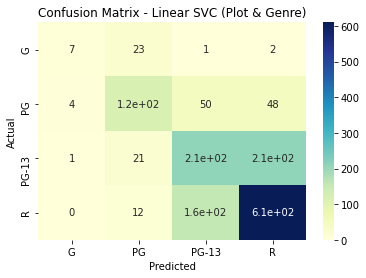

In [60]:
# Use Confusion Matrix to visualize
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions_svm)
df_cm = pd.DataFrame(cm, index=target_names, columns=target_names)

heatmap = sn.heatmap(df_cm, annot=True, cmap="YlGnBu")

plt.title("Confusion Matrix - Linear SVC (Plot & Genre)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.savefig('../image_highlights/rating_svc/confusion_matrix_linear_svc_with_genre.png')
plt.show()

In [61]:
# Check to see if the confusion matrix accounted for all predictions
total = 0
for column in df_cm.columns:
    total += df_cm[column].sum()
total

1474

In [62]:
len(y_test)

1474

# Save the Model

In [63]:
# Random forests model
import joblib

filename = os.path.join('..', 'flask_app','rating_linear_svc_with_genre.sav')
filename_flask = os.path.join('..', 'saved_models','rating_linear_svc_with_genre.sav')
joblib.dump(svm_model_genre, filename)
joblib.dump(svm_model_genre, filename_flask)

['../saved_models/rating_linear_svc_with_genre.sav']

In [64]:
# # Tuned model
# filename = os.path.join('..', 'saved_models','rating_linear_svc_with_genre.sav_tuned.sav')
# joblib.dump(grid, filename)